In [128]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns #Visualizing the distribution of a dataset
import scipy
import scipy.stats as st
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso, Ridge #Linear Regression , Lasso, Ridge
from sklearn import svm #Support Vector Regression 
from sklearn.ensemble import RandomForestRegressor #Random Forest
from sklearn.tree import DecisionTreeRegressor #Regression Decision tree
from sklearn.impute import SimpleImputer #Imputing Missing Values
from sklearn import metrics #For reporting evaluation results
from sklearn.model_selection import cross_val_score , GridSearchCV #Cross Validation & GridSearchCV for hyperparameter


#Importing the training data and get a general confirmation of what it looks like.
#Exploration of the data will help with the preparation of the data & with the implemtation of the model.

trainingdf = pd.read_csv('train.csv', index_col='Id')
testdf = pd.read_csv('test.csv', index_col='Id')

# combine train and test data 
df_all = pd.concat([trainingdf.drop('SalePrice', axis=1), testdf], sort=True)  #df without the target

#initial checking out what this data looks like
df_all.head()


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
2,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
3,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
4,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
5,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


Exploring the Data

In [129]:
#List all the headers of the dataset
df_all.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [130]:
df_all.shape

(2919, 79)

In [131]:
#From the result of this we can see all the columns and the target column 'SalePrice'
#The aim of this is , using the 79 explanatory variables describing (almost) every aspect of residential homes 
#in Ames, Iowa, predict the final price of each home for a test set.

#Next , I want to see which columns are numerical & which are categorical.

numeric_features = df_all.select_dtypes(include=[np.number])
categorical_features = df_all.select_dtypes(include=[np.object])

print("There are ", len(list(numeric_features.columns)) , "Numerical Features. These are : " , "\n")
print(list(numeric_features.columns), "\n")


print('There are', len(list(categorical_features.columns)), "Categorical Features. These are : " , "\n")
print(list(categorical_features.columns), "\n")

There are  36 Numerical Features. These are :  

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold'] 

There are 43 Categorical Features. These are :  

['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', '

In [132]:
#Exploring independant variables & Their relationship with the target variable


#From the below we can see correlations with saleprice.
#This can help determine a causal relationship and which features can impact the target feature the most.
# I will print all correlations seen with sale price.

corr = trainingdf.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


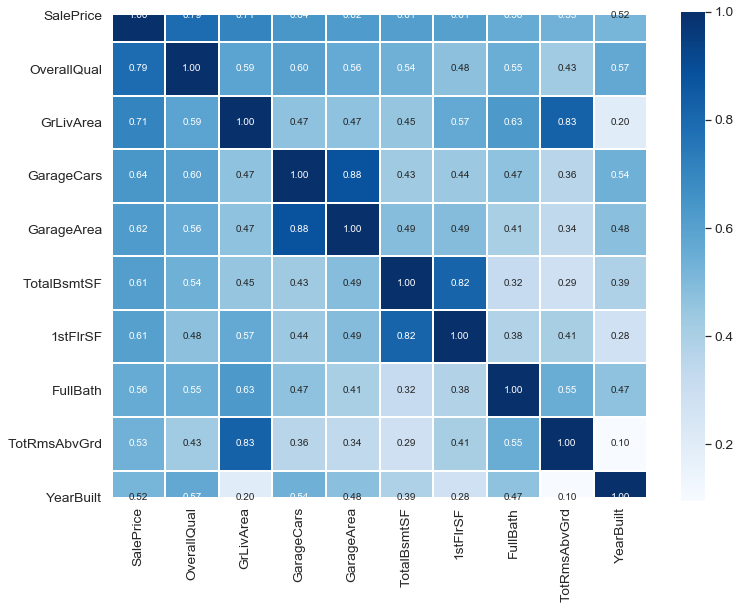

In [133]:

# From the above you can see there are correlations seen within the training dataset.
# Exploring can also be done by means of a correlations matrix
# This will help to assess with collinearity of variables seen above.
plt.figure(figsize=(12, 9))

k = 10 #Showing the top 10 from above list

cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(trainingdf[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, 
                 cmap="Blues",
                 cbar=True, 
                 annot=True, 
                 square=True,
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=cols.values, 
                 xticklabels=cols.values,
                 linewidths= 1
                )
plt.show()



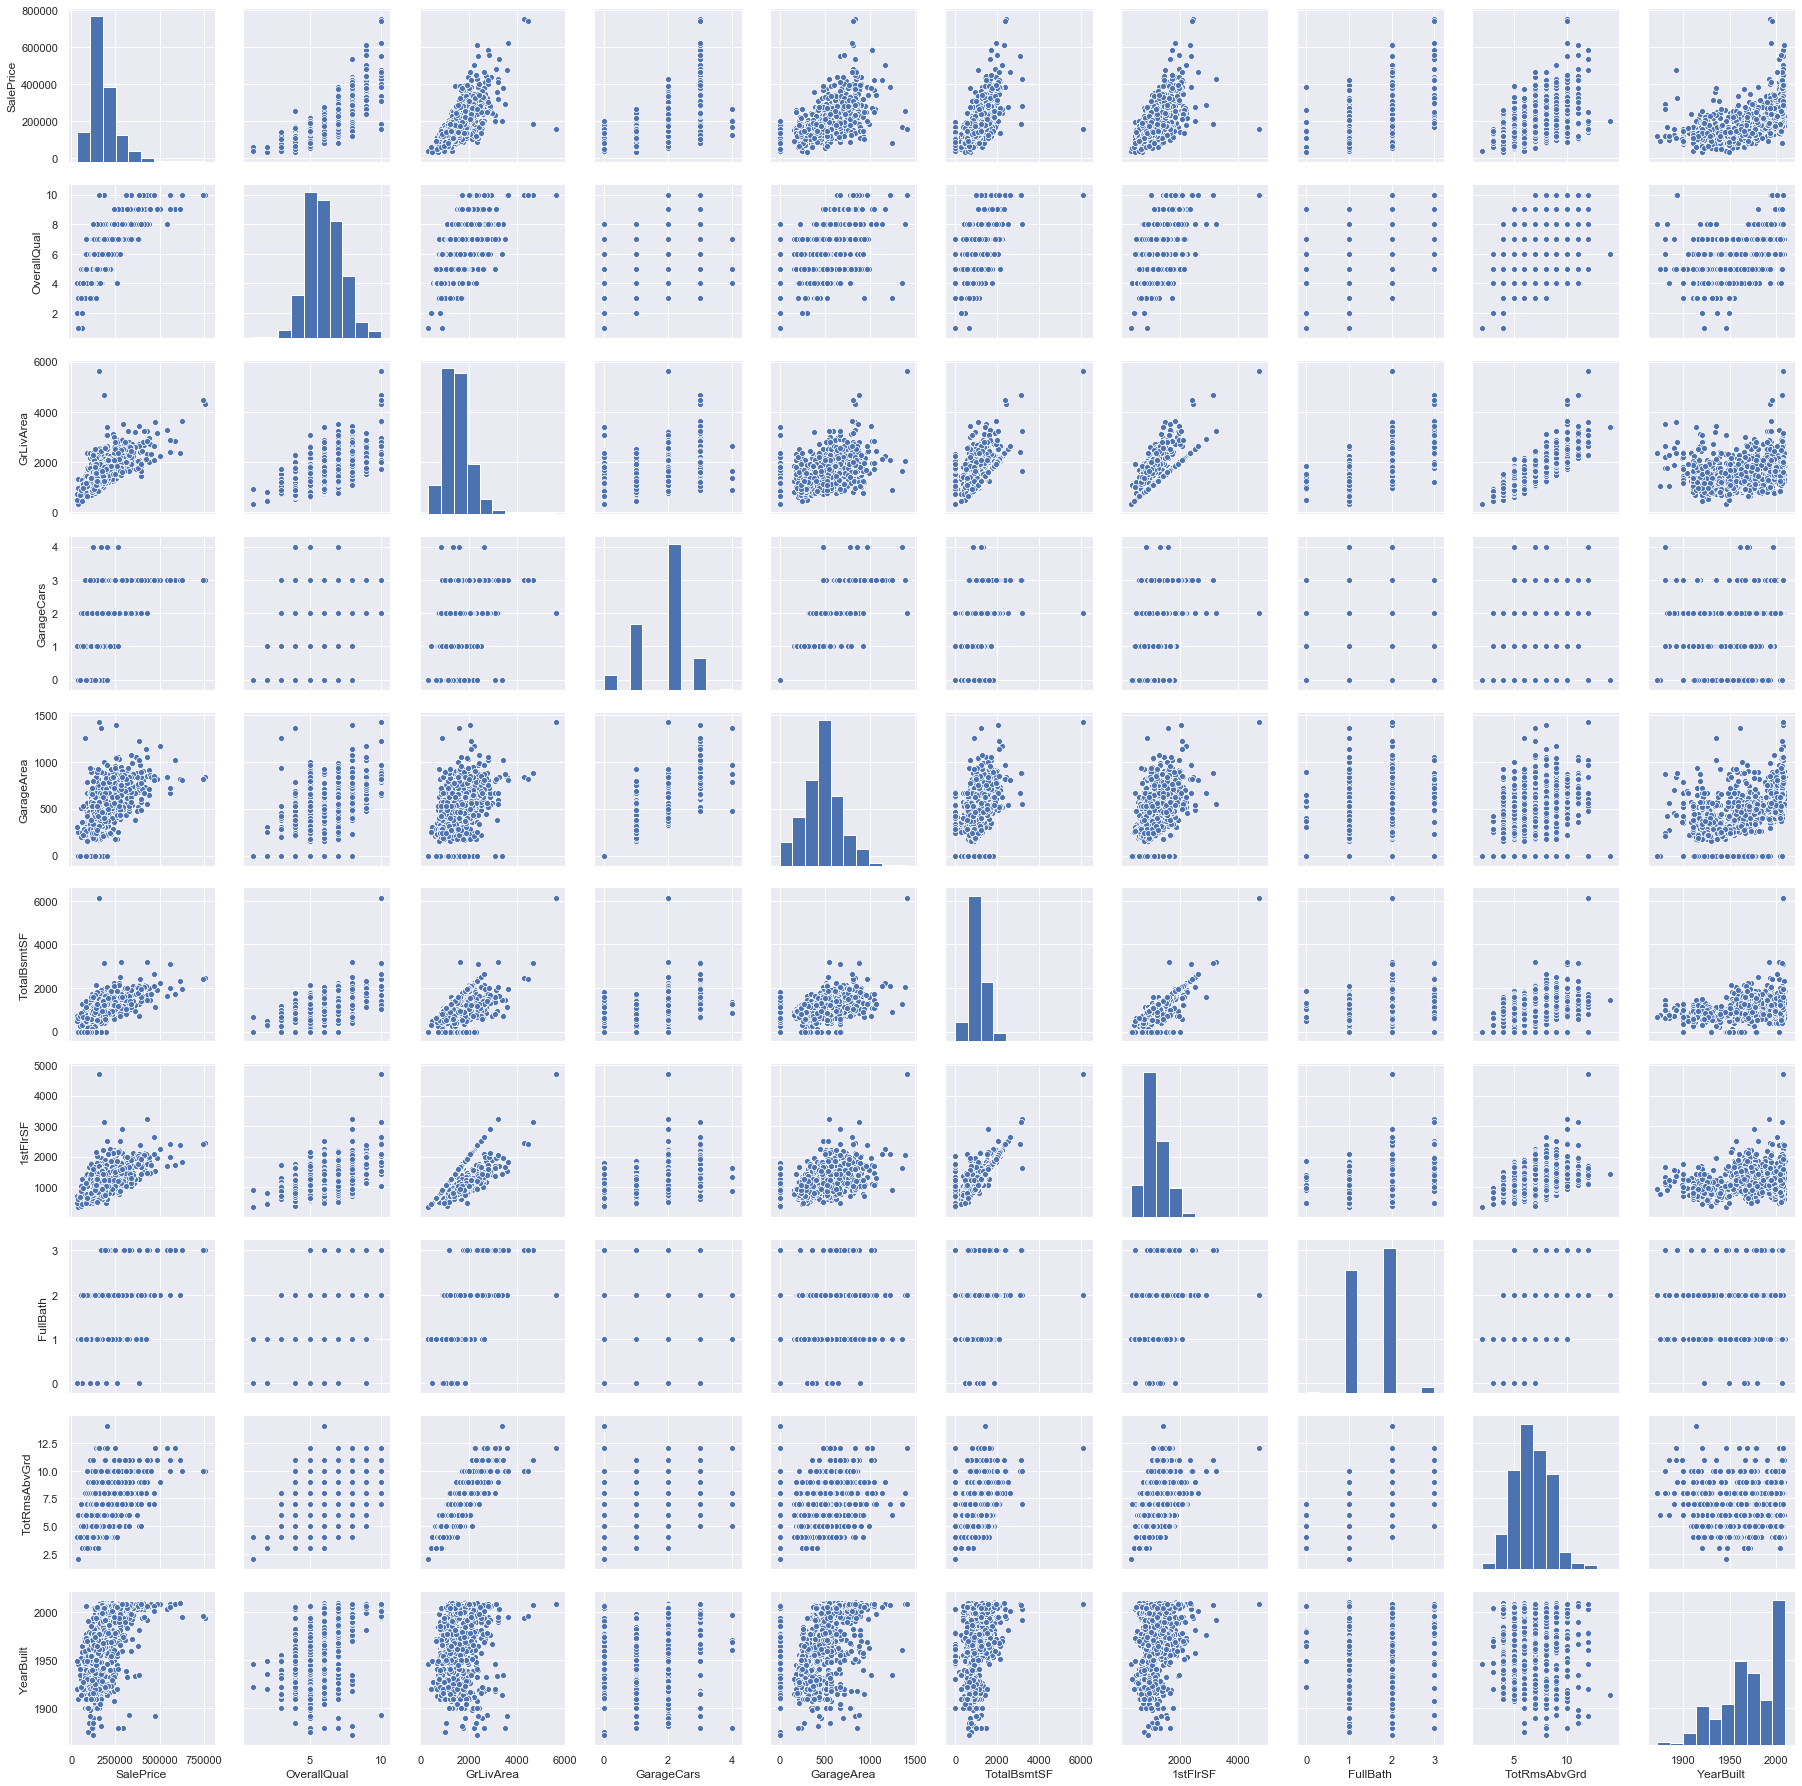

In [134]:

#Visualising all features and their relationships with one another
# It is important to determine if there are causal relationships in the data and we can see the above correlations in the data.

sns.set()
sns.pairplot(trainingdf[cols], height = 2.5)
plt.show();

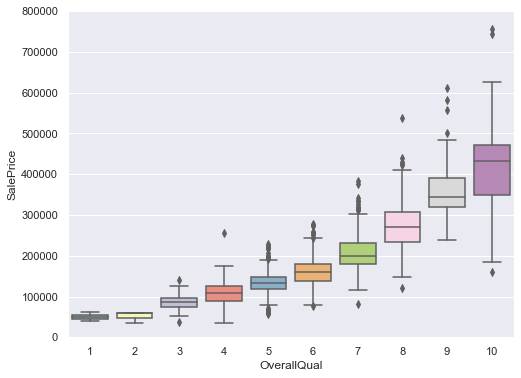

In [135]:
# I will now explore the top features that impact sales price.
# These being 
# 1) 'OverallQual' (Overall Quality)
# 2) 'GrLivArea' (Above grade (ground) living area) (Collinear with other area based features)
# 3) 'GarageCars'(Collinear with other garage features like GarageArea)
# 4) 'YearBuilt'

#box plot overallqual / saleprice
# Categorical / Numerical

data = pd.concat([trainingdf['SalePrice'], trainingdf['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="OverallQual", y="SalePrice", data=data , palette="Set3")
fig.axis(ymin=0, ymax=800000);

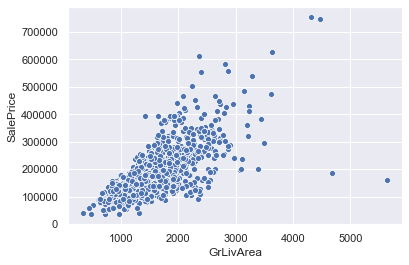

In [136]:
#scatter plot grlivarea/saleprice

data = pd.concat([trainingdf['SalePrice'], trainingdf['GrLivArea']], axis=1)
sns.scatterplot(x="GrLivArea", y="SalePrice", data=data);

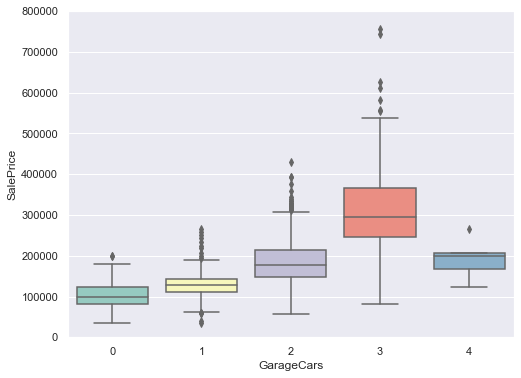

In [137]:
#Bar plot for 'YearBuilt'/ 'SalePrice'

data = pd.concat([trainingdf['SalePrice'], trainingdf['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=data , palette="Set3")
fig.axis(ymin=0, ymax=800000);

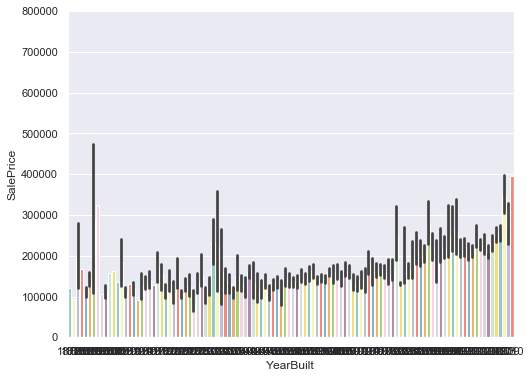

In [138]:
#Bar plot for 'YearBuilt'/ 'SalePrice'

data = pd.concat([trainingdf['SalePrice'], trainingdf['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x='YearBuilt', y="SalePrice", data=data , palette="Set3")
fig.axis(ymin=0, ymax=800000);


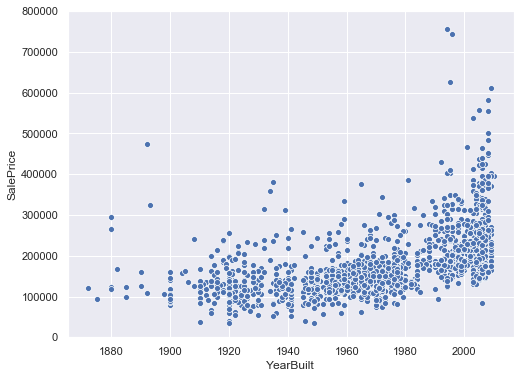

In [139]:
data = pd.concat([trainingdf['SalePrice'], trainingdf['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x='YearBuilt', y="SalePrice", data=data , palette="Set3")
fig.axis(ymin=0, ymax=800000);

The above showing signs that these variables will prove useful when predicting sales price of a test set.
It will be these features that allow for affective training of the models.
The next step now is to clean the datesets (both training and test). After this is done , I will take a closer look at the target variable and I will normalize it to allow for efficient modelling.

In [140]:
#CLEANING THE DATA

In [141]:
#Resolving outliers within the top correlated features.


# 1) 'OverallQual' (Overall Quality)
# From above exploration , we can see that there are a few obvious outliers present within this relationship. I will remove those below

trainingdf = trainingdf.drop(trainingdf[(trainingdf.OverallQual==4) & (trainingdf.SalePrice>200000)].index)
trainingdf = trainingdf.drop(trainingdf[(trainingdf.OverallQual==10) & (trainingdf.SalePrice<200000)].index)
trainingdf = trainingdf.drop(trainingdf[(trainingdf.OverallQual==8) & (trainingdf.SalePrice>500000)].index)

# 2) 'GrLivArea' (Above grade (ground) living area) (Collinear with other area based features)

trainingdf = trainingdf.drop(trainingdf[(trainingdf.GrLivArea>4000) & (trainingdf.SalePrice<200000)].index)
trainingdf = trainingdf.drop(trainingdf[(trainingdf.GrLivArea<1500) & (trainingdf.SalePrice>350000)].index)

# 3) 'GarageCars'(Collinear with other garage features like GarageArea) , I do not believe there are any drastic outliers here based off this relationship.


# 4) 'YearBuilt' (based off the scatterplot visualisation)

trainingdf = trainingdf.drop(trainingdf[(trainingdf.YearBuilt<1900) & (trainingdf.SalePrice>400000)].index)
trainingdf = trainingdf.drop(trainingdf[(trainingdf.YearBuilt>2000) & (trainingdf.SalePrice<100000)].index)

In [142]:
trainingdf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [143]:
#missing data

df_all = pd.concat([trainingdf.drop('SalePrice', axis=1), testdf], sort=True)  #re-initialize

# Missung values 
print('Missing values:' ,df_all.isnull().sum().sum())


Missing values: 13932


In [144]:
#What variables have most missing data percentage of Data
total = df_all.isnull().sum().sort_values(ascending=False)
percent = (df_all.isnull().sum()/df_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)


,Total,Percent
PoolQC,2903,0.996909
MiscFeature,2807,0.963942
Alley,2714,0.932005
Fence,2342,0.804258
FireplaceQu,1419,0.487294
LotFrontage,485,0.166552
GarageFinish,158,0.054258
GarageQual,158,0.054258
GarageYrBlt,158,0.054258
GarageCond,158,0.054258


In [145]:

#First step is to sort out the missing value for the numeric features previously explored above.
# For this , I will use the median value 

numeric_features = df_all.select_dtypes(include=[np.number]) #re-initialize
categorical_features = df_all.select_dtypes(include=[np.object])


imp = SimpleImputer(missing_values=np.nan, strategy='median')
df_all.loc[:, df_all.dtypes != np.object] = imp.fit_transform(numeric_features)
df_all.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856.0,854.0,0.0,NaN,3.0,1Fam,TA,No,706.0,0.0,...,WD,0.0,Pave,8.0,856.0,AllPub,0.0,2003.0,2003.0,2008.0
2,1262.0,0.0,0.0,NaN,3.0,1Fam,TA,Gd,978.0,0.0,...,WD,0.0,Pave,6.0,1262.0,AllPub,298.0,1976.0,1976.0,2007.0
3,920.0,866.0,0.0,NaN,3.0,1Fam,TA,Mn,486.0,0.0,...,WD,0.0,Pave,6.0,920.0,AllPub,0.0,2001.0,2002.0,2008.0
4,961.0,756.0,0.0,NaN,3.0,1Fam,Gd,No,216.0,0.0,...,WD,0.0,Pave,7.0,756.0,AllPub,0.0,1915.0,1970.0,2006.0
5,1145.0,1053.0,0.0,NaN,4.0,1Fam,TA,Av,655.0,0.0,...,WD,0.0,Pave,9.0,1145.0,AllPub,192.0,2000.0,2000.0,2008.0


In [146]:
# MissIng values recount 
print('Missing values:' ,df_all.isnull().sum().sum())


Missing values: 13256


In [147]:
#Next job is to take a look in to the missing values within the Categorical Features (43 of them)
#Taking a closer look in to these variables , there are a group of features that missing values simply represents that the feature does not exist on the property.
#This is clarified within supporting document "data_description.txt"
#For example "Alley" -> NA means No alley access AND BsmtQual -> NA means No Basement

edit_values = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
              'GarageQual','PoolQC','Fence','MiscFeature','MasVnrType', 'GarageCond', 'GarageFinish']

for col in edit_values:
    df_all[col].fillna('None',inplace=True)
    
#The remainder of variables with missing values
#For the remainder I will impute the most frequent

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_all.loc[:, df_all.dtypes == np.object] = imp.fit_transform(categorical_features)
df_all.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856.0,854.0,0.0,Grvl,3.0,1Fam,TA,No,706.0,0.0,...,WD,0.0,Pave,8.0,856.0,AllPub,0.0,2003.0,2003.0,2008.0
2,1262.0,0.0,0.0,Grvl,3.0,1Fam,TA,Gd,978.0,0.0,...,WD,0.0,Pave,6.0,1262.0,AllPub,298.0,1976.0,1976.0,2007.0
3,920.0,866.0,0.0,Grvl,3.0,1Fam,TA,Mn,486.0,0.0,...,WD,0.0,Pave,6.0,920.0,AllPub,0.0,2001.0,2002.0,2008.0
4,961.0,756.0,0.0,Grvl,3.0,1Fam,Gd,No,216.0,0.0,...,WD,0.0,Pave,7.0,756.0,AllPub,0.0,1915.0,1970.0,2006.0
5,1145.0,1053.0,0.0,Grvl,4.0,1Fam,TA,Av,655.0,0.0,...,WD,0.0,Pave,9.0,1145.0,AllPub,192.0,2000.0,2000.0,2008.0


In [148]:
# MissIng values recount 
print('Missing values:' ,df_all.isnull().sum().sum())

Missing values: 0


In [149]:
#Convert categorical variable into dummy
df_all = pd.get_dummies(df_all)

In [150]:
#-------------- Exploring & Normalizing the target -------------#

#Exploring the dependant target column 'SalePrice' within the training data and modifying it to normalize it.

#descriptive statistics 
trainingdf['SalePrice'].describe()


count      1453.000000
mean     180354.229869
std       78438.251759
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

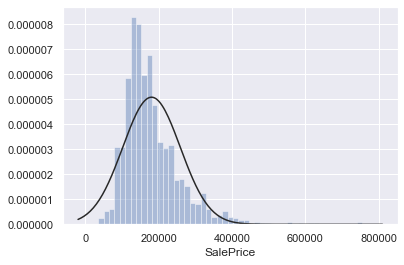

In [151]:
#histogram using Seaborn 
#https://seaborn.pydata.org/tutorial/distributions.html

sns.distplot(trainingdf['SalePrice'],  kde=False, fit=st.norm);

In [152]:
#Can see that it does not initially look to be a normal distribution.
#Using Skewness and Kurtosis , I can verify this 
#If Skewness or Kurtosis falls within the range -2,2 it can be considered Normal Distribution

print("Skewness: %f" % trainingdf['SalePrice'].skew())
print("Kurtosis: %f" % trainingdf['SalePrice'].kurt())



Skewness: 1.873125
Kurtosis: 6.664928


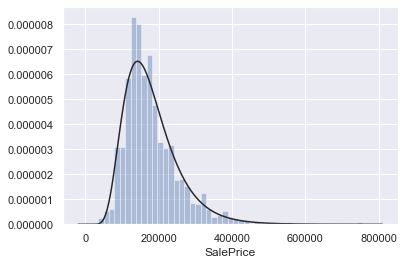

In [153]:
#Due to this , The target needs to transformed. Testing log tranformation we can see it provides a better fit

sns.distplot(trainingdf['SalePrice'],  kde=False, fit=st.lognorm);

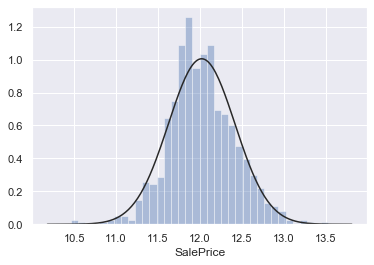

In [154]:
#From the above results , I can see that this is is a better fit.
#Next step is to transform
#This will become 

trainingdf['SalePrice'] = np.log(trainingdf['SalePrice'])
sns.distplot(trainingdf['SalePrice'],  kde=False, fit=st.norm)

In [155]:
print("Skewness: %f" % trainingdf['SalePrice'].skew())
print("Kurtosis: %f" % trainingdf['SalePrice'].kurt())

#Falling into normal distribution based on these results.

Skewness: 0.104476
Kurtosis: 0.814888


In [156]:
# After this analysis , finally then adding the target back to our df_all
df_all = pd.concat([df_all, trainingdf['SalePrice']], axis = 1)


In [157]:
#Separating the Dataset back in to training and test data after the cleaning and preprocessing

trainingdf=df_all.loc[  : 1460] #last row of initial training dataset
testdf=df_all.loc[1461 : ].drop('SalePrice', axis=1) #first row of initial testing dataset

In [158]:
Y_target = trainingdf['SalePrice']
X_features = trainingdf.drop('SalePrice', axis=1)
test = testdf.copy()

print("Number of training features " + str(X_features.shape))
print("Number of target features" + str(Y_target.shape))

Number of training features (1453, 287)
Number of target features(1453,)


In [159]:
#---------- MODELLING ------#


# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_target, test_size = 0.3, random_state = 1)

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))


X_train : (1017, 287)
X_test : (436, 287)
y_train : (1017,)
y_test : (436,)


In [160]:
#Ridge Model optimal Alpha Justification

ridge = Ridge()
parameters = { 'alpha' : [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100] }


ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)

ridge_regressor.fit(X_train, y_train)

print (ridge_regressor.best_params_)

/Users/shanemcquillan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3832e-21): result may not be accurate.
  overwrite_a=True).T
/Users/shanemcquillan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.30706e-20): result may not be accurate.
  overwrite_a=True).T
/Users/shanemcquillan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61787e-19): result may not be accurate.
  overwrite_a=True).T


{'alpha': 15}


In [161]:
# Ridge Regression Model

print("\u0332".join("Evalutation of Ridge Regression Model: \n"))


Rlr = Ridge(alpha = 15)
rmse = np.sqrt(-cross_val_score(Rlr, X_features, Y_target, scoring="neg_mean_squared_error", cv=10))
print("The average RMSE With 10 fold CV : ", rmse.mean()) #Evaluation Metric


#Train the model using the training sets
Rlrmodel = Rlr.fit(X_train, y_train)               


#Predict the response for test dataset
Y_test_pred = Rlrmodel.predict(X_test)


#print ( "RMSE For training linear regression ", np.sqrt(metrics.mean_squared_error(y_train, Y_train_pred)))
print ( "RMSE For testing Ridge regression (Without CV) with train_test_split : ", 
       np.sqrt(metrics.mean_squared_error(y_test, Y_test_pred)))

rmseridge = rmse.mean()

#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

#print('Train Score (R² score):',lrmodel.score(X_train, y_train))
print('Test Score (R² score) with train_test_split :',Rlrmodel.score(X_test, y_test))


#Linear Regression prediction on the Actual test dataset
LinearRegression_Pred = Rlrmodel.predict(test)

E̲v̲a̲l̲u̲t̲a̲t̲i̲o̲n̲ ̲o̲f̲ ̲R̲i̲d̲g̲e̲ ̲R̲e̲g̲r̲e̲s̲s̲i̲o̲n̲ ̲M̲o̲d̲e̲l̲:̲ ̲

The average RMSE With 10 fold CV :  0.11083620883202416
RMSE For testing Ridge regression (Without CV) with train_test_split :  0.11901117861758831
Test Score (R² score) with train_test_split : 0.903047243927154


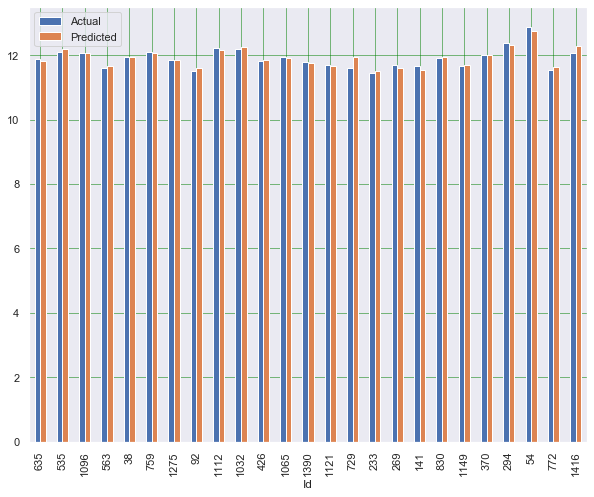

In [162]:
#Take a sneakpeak ad predictions to see how it looks

dfR = pd.DataFrame({'Actual': y_test, 'Predicted': Y_test_pred})
df1R = dfR.head(25)
df1R.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [163]:
#Lasso Model Alpha optimal justification

lasso = Lasso()
parameters = { 'alpha' : [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4,
                          1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 
                          10, 15, 18, 20, 30, 50, 75, 100] 
             }


lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X_train, y_train)

print (lasso_regressor.best_params_)


/Users/shanemcquillan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4035704102862003, tolerance: 0.012939268592506747
  positive)
/Users/shanemcquillan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4425606466346377, tolerance: 0.012910924991038684
  positive)
/Users/shanemcquillan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5671283947615544, tolerance: 0.013533403239919332
  positive)
/Users/shanemcquillan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning

/Users/shanemcquillan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3802989832995705, tolerance: 0.013033812531003816
  positive)
/Users/shanemcquillan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9578390591534185, tolerance: 0.012939268592506747
  positive)
/Users/shanemcquillan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9788943017606897, tolerance: 0.012910924991038684
  positive)
/Users/shanemcquillan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning

{'alpha': 0.0005}


/Users/shanemcquillan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.17555781992442, tolerance: 0.016504614469317513
  positive)


In [164]:
#Lasso Model

lasso = Lasso(alpha = 0.0007, max_iter = 50000) 

#Increasing the max interations iteratively due to above warning:
#"You might want to increase the number of iterations" 
#-> Default is 1000


print("\u0332".join("Evalutation of Lasso Model: \n"))

rmse = np.sqrt(-cross_val_score(lasso, X_features, Y_target, scoring="neg_mean_squared_error", cv=10))
print("The average RMSE With 10 fold CV : ", rmse.mean()) #Evaluation Metric



#Train the model using the training sets
lassomodel= lasso.fit(X_train, y_train)

#Predict the response for test dataset
Y_test_pred = lassomodel.predict(X_test)

#Root Mean Squared error for evaluation 

rmselasso = rmse.mean()

print ( "RMSE For testing Lasso (Without CV) with train_test_split : ", 
       np.sqrt(metrics.mean_squared_error(y_test, Y_test_pred)))

#print('Train Score (R² score):',lassomodel.score(X_train, y_train))
print('Test Score (R² score) with train_test_split : ',lassomodel.score(X_test, y_test))


#Linear Regression prediction on the Actual test dataset
Lasso_Pred = lassomodel.predict(test)

E̲v̲a̲l̲u̲t̲a̲t̲i̲o̲n̲ ̲o̲f̲ ̲L̲a̲s̲s̲o̲ ̲M̲o̲d̲e̲l̲:̲ ̲

The average RMSE With 10 fold CV :  0.10981985915531008
RMSE For testing Lasso (Without CV) with train_test_split :  0.11760549192088839
Test Score (R² score) with train_test_split :  0.9053240105738065


In [165]:
#Hyperparameter Tuning the Decision Tree Regressor 
# Create the parameter grid based on the results of random search 
param_grid = {
    
    'max_depth': [5,10,15,20],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3,5,8],
}

# Create a based model
dt =  DecisionTreeRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, scoring = 'neg_mean_squared_error' ,cv = 10 )
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 3}


In [166]:
#Decision Tree Regressor
print("\u0332".join("Evalutation of Decision Tree Regessor Model: \n"))


dt = DecisionTreeRegressor(max_depth = 10 , min_samples_leaf = 5, min_samples_split = 3 )
rmse = np.sqrt(-cross_val_score(dt, X_features, Y_target, scoring="neg_mean_squared_error", cv=10))
print("The average RMSE With 10 fold CV : ", rmse.mean()) #Evaluation Metric

#Train the model using the training sets
dtmodel= dt.fit(X_train, y_train)


#Predict the response for test dataset
Y_test_pred = dtmodel.predict(X_test)


#Root Mean Squared error for evaluation 
rmsedt = rmse.mean()

print ( "RMSE For testing Decision Tree Regressor (Without CV) with train_test_split : ", 
       np.sqrt(metrics.mean_squared_error(y_test, Y_test_pred)))


#print('Train Score (R² score):',dtmodel.score(X_train, y_train))
print('Test Score (R² score) :',dtmodel.score(X_test, y_test))


#Linear Regression prediction on the Actual test dataset

DecisionTreeRegressor_Pred = dtmodel.predict(test)



E̲v̲a̲l̲u̲t̲a̲t̲i̲o̲n̲ ̲o̲f̲ ̲D̲e̲c̲i̲s̲i̲o̲n̲ ̲T̲r̲e̲e̲ ̲R̲e̲g̲e̲s̲s̲o̲r̲ ̲M̲o̲d̲e̲l̲:̲ ̲

The average RMSE With 10 fold CV :  0.1809021297368271
RMSE For testing Decision Tree Regressor (Without CV) with train_test_split :  0.19695456989441376
Test Score (R² score) : 0.7344680584303402


In [167]:
#Hyperparameter Tuning the Random Forest in Python
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,15,20],
    'max_features': [None],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3,5,8],
    'n_estimators': [30,50,70] #Keeping computation power & time in mind , From testing -> Greater is better
}

# Create a based model
rf =  RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'neg_mean_squared_error' ,cv = 3 )
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 20, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 70}


In [168]:
#Random Forest Model with and without K-Fold Cross Validation 

print("\u0332".join("Evalutation of Random Forest Model: \n"))


randomF = RandomForestRegressor(n_estimators=50, #The number of trees in the forest.    
                          max_depth=20,
                          min_samples_split=5,
                          min_samples_leaf=3,
                          max_features=None,
                          random_state=42)#Popular integer random seeds are 0 and 42.

rmse = np.sqrt(-cross_val_score(randomF, X_features, Y_target, scoring="neg_mean_squared_error", cv=10))
print("The average RMSE With 10 fold CV : ", rmse.mean()) #Evaluation Metric


#Train the model using the training sets
RandomForestmodel= randomF.fit(X_train, y_train)

#Predict the response for test dataset
Y_test_pred = RandomForestmodel.predict(X_test)

#Root Mean Squared error for evaluation 
rmseRF = rmse.mean()
print ( "RMSE For testing Random Forest Model Without CV with train_test_split : ",
       np.sqrt(metrics.mean_squared_error(y_test, Y_test_pred)))

#print('Train Score (R² score):',RandomForestmodel.score(X_train, y_train))
print('Test Score (R² score) with train_test_split :',RandomForestmodel.score(X_test, y_test))

#Linear Regression prediction on the Actual test dataset

RandomForest_Pred = RandomForestmodel.predict(test)

E̲v̲a̲l̲u̲t̲a̲t̲i̲o̲n̲ ̲o̲f̲ ̲R̲a̲n̲d̲o̲m̲ ̲F̲o̲r̲e̲s̲t̲ ̲M̲o̲d̲e̲l̲:̲ ̲

The average RMSE With 10 fold CV :  0.1348987368986595
RMSE For testing Random Forest Model Without CV with train_test_split :  0.1464054972346634
Test Score (R² score) with train_test_split : 0.8532765890569811


In [169]:
#Hyperparameter Tuning the Support Vector Regression Model

Cs = [0.001, 0.01, 0.1, 1, 10] #using multiples of 10’s 
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svr = svm.SVR()
grid_search = GridSearchCV(estimator = svr, param_grid = param_grid, scoring = 'neg_mean_squared_error' ,cv = 3, )# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'C': 10, 'gamma': 0.001}


In [170]:
#Support Vector Regression Model


print("\u0332".join("Evalutation of Support Vector Regression Model: \n"))


svmr = svm.SVR(C= 1, gamma=0.001)
rmse = np.sqrt(-cross_val_score(svmr, X_features, Y_target, scoring="neg_mean_squared_error", cv=10))
print("The average RMSE With 10 fold CV : ", rmse.mean()) #Evaluation Metric

#Train the model using the training sets
svrmodel= svmr.fit(X_train, y_train)


#Predict the response for test dataset
Y_test_pred = svrmodel.predict(X_test)



#Root Mean Squared error for evaluation 
print ( "RMSE For testing Support Vector Regression Without CV with train_test_split : ", 
       np.sqrt(metrics.mean_squared_error(y_test, Y_test_pred)))

rmsesvr = rmse.mean()

print('Test Score (R² score) with train_test_split :',svrmodel.score(X_test, y_test))
#Linear Regression prediction on the Actual test dataset

SupportVectorResgression_Pred = svrmodel.predict(test)

E̲v̲a̲l̲u̲t̲a̲t̲i̲o̲n̲ ̲o̲f̲ ̲S̲u̲p̲p̲o̲r̲t̲ ̲V̲e̲c̲t̲o̲r̲ ̲R̲e̲g̲r̲e̲s̲s̲i̲o̲n̲ ̲M̲o̲d̲e̲l̲:̲ ̲

The average RMSE With 10 fold CV :  0.39518688586630313
RMSE For testing Support Vector Regression Without CV with train_test_split :  0.38338434458584625
Test Score (R² score) with train_test_split : -0.006128372192598652


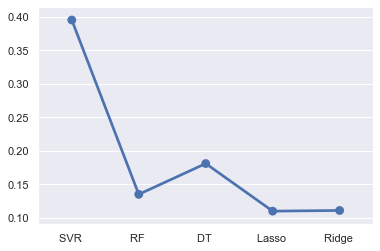

In [171]:
#Visualising the best scores

scores = np.array([rmsesvr,rmseRF,rmsedt,rmselasso, rmseridge])
sns.pointplot(x = ['SVR ' , 'RF ', 'DT ', 'Lasso ', 'Ridge '] ,y=scores);

In [172]:
# Read in sample_submission dataframe
submission = pd.read_csv('sample_submission.csv')
submission.shape

(1459, 2)

In [173]:
submission.head(5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [174]:
# Append predictions from lasso & reverse normalization

submission.iloc[:,1] = np.floor(np.exp(Lasso_Pred))

In [175]:
submission.head(5)

,Id,SalePrice
0,1461,121537.0
1,1462,149996.0
2,1463,178603.0
3,1464,199755.0
4,1465,185362.0


In [176]:
submission.to_csv("actual_submission.csv", index=False)